## RNA-Seq

Install the required libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scanpy

     |████████████████████████████████| 2.0 MB 4.2 MB/s 
     |████████████████████████████████| 91 kB 13.9 MB/s 
     |████████████████████████████████| 86 kB 8.2 MB/s 
     |████████████████████████████████| 1.1 MB 61.3 MB/s 
     |████████████████████████████████| 63 kB 2.8 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=db5a8ac6cb9e3ce917033518fd52fedd722746d4930cdee1689bba440a1935fb
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=8ce7c6063fbf0773a8b14ae12f3b25e8d1ba834dbeeef6d34bbf2b34e327b096
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
  Created wheel for sinfo: filename=sinfo-0.3.4-py3-none-any.whl size=7899 sha256=4ef1aae0c54faadf0470cdcb1785120dd8f018f56d57e444038030a8a1f2ec41
  Stored in directory: /root/.cache/p

In [ ]:
!pip install leidenalg

     |████████████████████████████████| 1.4 MB 4.2 MB/s 
     |████████████████████████████████| 3.1 MB 80.7 MB/s 


In [ ]:
!pip install AnnData

In [ ]:
!pip install episcanpy

     |████████████████████████████████| 50.3 MB 1.2 MB/s 
     |████████████████████████████████| 184 kB 62.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 4.0 MB 22.7 MB/s 
     |████████████████████████████████| 14.9 MB 57.3 MB/s 
  Created wheel for episcanpy: filename=episcanpy-0.3.2-py3-none-any.whl size=125232 sha256=fdc3c0243712a92bf6cb183196f2d6e5835da9dd7d423d0c91a473075289caa8
  Stored in directory: /root/.cache/pip/wheels/80/ee/b2/c1d719a7519d3eb034a7959d6bb24ac5603a783c75b45c8b12
  Created wheel for bamnostic: filename=bamnostic-1.1.8-py3-none-any.whl size=178415 sha256=5eef6550a02faf4924bf4d94da20b3188112b0a6ab56a29a239133c09aa83ddb
  Stored in directory: /root/.cache/pip/wheels/14/c1/83/8e29a56af1c1bb5c72fe2e8420d9a72b2326a59fc6d96c5628
Successfully built episcanpy bamnostic


Import the required libraries

In [ ]:
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
import episcanpy.api as epi
import os
import scipy.io
from sklearn.cluster import KMeans

In [ ]:
results_file = 'write/hw1.h5ad'

In [ ]:
path='drive/MyDrive/ML_In_Bio/Hw2'

### 1.1 Data preparation (RNA-Seq)
Reading the RNA-Seq data

In [ ]:
# define MEX directory
matrix_dir = "GSE126074_AdBrainCortex_SNAREseq_cDNA.counts.mtx"
# read in MEX format matrix as table
mat = scipy.io.mmread(os.path.join("", path+"/GSE126074_AdBrainCortex_SNAREseq_cDNA.counts.mtx.gz"))
mat1=pd.DataFrame.sparse.from_spmatrix(mat)
mat=sc.AnnData(mat1)

In [ ]:
rna_count = mat.T
rna_barcode=pd.read_csv(path+"/GSE126074_AdBrainCortex_SNAREseq_cDNA.barcodes.tsv",sep="/t",header=None)
rna_gene=pd.read_csv(path+"/GSE126074_AdBrainCortex_SNAREseq_cDNA.genes.tsv",sep="/t",header=None)

In [ ]:
rna_count

AnnData object with n_obs × n_vars = 10309 × 33160

In [ ]:
rna_gene.head()

,0
0,0610005C13Rik
1,0610007P14Rik
2,0610009B22Rik
3,0610009E02Rik
4,0610009L18Rik


In [ ]:
rna_barcode.head()

,0
0,09A_CAGCCCCGCCTT
1,09A_CGCCTACCATGA
2,09A_GATGCGCGGCTA
3,09A_GGTCCGAGTCCT
4,09A_TCTCCCGGCACC


In [ ]:
rna_count.var['gene_ids'] = rna_gene[0].values
rna_count.var_names_make_unique(join="-")

In [ ]:
rna_count.obs_names=rna_barcode[0]
rna_count.obs_names_make_unique(join="-")

In [ ]:
len(rna_barcode) #cells

10309

In [ ]:
len(rna_gene) #genes

33160

In [ ]:
rna_count.var #RNA genes

,gene_ids
0,0610005C13Rik
1,0610007P14Rik
2,0610009B22Rik
3,0610009E02Rik
4,0610009L18Rik
...,...
33155,Vmn2r-ps83
33156,Vmn2r50
33157,Vpreb2
33158,n-R5s32


In [ ]:
rna_count.obs # Cells

""
09A_CAGCCCCGCCTT
09A_CGCCTACCATGA
09A_GATGCGCGGCTA
09A_GGTCCGAGTCCT
09A_TCTCCCGGCACC
...
09L_TACTAGTTCAAG
09L_ATGACGGGCCCC
09L_GAAACACCTCAT
09L_AACGGTTTATCC


In [ ]:
rna_barcode[0] # cells

0        09A_CAGCCCCGCCTT
1        09A_CGCCTACCATGA
2        09A_GATGCGCGGCTA
3        09A_GGTCCGAGTCCT
4        09A_TCTCCCGGCACC
               ...       
10304    09L_TACTAGTTCAAG
10305    09L_ATGACGGGCCCC
10306    09L_GAAACACCTCAT
10307    09L_AACGGTTTATCC
10308    09L_GACTGATACAGT
Name: 0, Length: 10309, dtype: object

## Preprocessing

Show the top 20 genes that yield the highest fraction of counts in each single cell, across all cells.

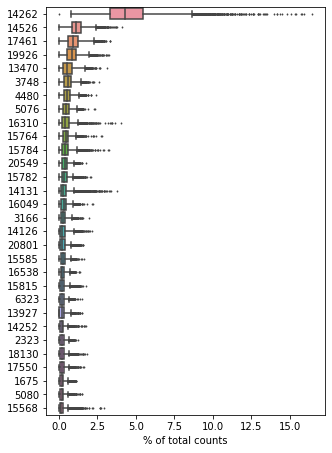

In [ ]:
sc.pl.highest_expr_genes(rna_count, n_top=30,) # gene count spread over the cells

#### Filtering out the data

In [ ]:
sc.pp.filter_cells(rna_count, min_genes=200) #filtering out the cells

In [ ]:
sc.pp.filter_genes(rna_count, min_cells=3)

filtered out 7757 genes that are detected in less than 3 cells

In [ ]:
rna_count.obs

,n_genes
09A_CAGCCCCGCCTT,2350
09A_CGCCTACCATGA,2351
09A_GATGCGCGGCTA,2495
09A_GGTCCGAGTCCT,2340
09A_TCTCCCGGCACC,2159
...,...
09L_TACTAGTTCAAG,251
09L_ATGACGGGCCCC,343
09L_GAAACACCTCAT,256
09L_AACGGTTTATCC,355


In [ ]:
rna_count.var

,gene_ids,n_cells
0,0610005C13Rik,15
1,0610007P14Rik,355
2,0610009B22Rik,145
3,0610009E02Rik,140
4,0610009L18Rik,148
...,...,...
32431,Ifitm5,3
32692,Gm43567,3
32700,Gm7648,3
32726,Olfr43,3


In [ ]:
rna_count.var['mt'] = rna_count.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(rna_count, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [ ]:
rna_count.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
09A_CAGCCCCGCCTT,2350,2343,4615.0,0.0,0.0
09A_CGCCTACCATGA,2351,2348,4780.0,0.0,0.0
09A_GATGCGCGGCTA,2495,2494,4867.0,0.0,0.0
09A_GGTCCGAGTCCT,2340,2338,4663.0,0.0,0.0
09A_TCTCCCGGCACC,2159,2157,4337.0,0.0,0.0
...,...,...,...,...,...
09L_TACTAGTTCAAG,251,251,290.0,0.0,0.0
09L_ATGACGGGCCCC,343,343,508.0,0.0,0.0
09L_GAAACACCTCAT,256,256,320.0,0.0,0.0
09L_AACGGTTTATCC,355,355,436.0,0.0,0.0


1.total counts gives the total number of gene counts in the cell

2.n genes gives the number of disticnt genes present in the cell

In [ ]:
rna_count.var

,gene_ids,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
0,0610005C13Rik,15,False,15,0.001455,99.854496,15.0
1,0610007P14Rik,355,False,355,0.038219,96.556407,394.0
2,0610009B22Rik,145,False,145,0.016199,98.593462,167.0
3,0610009E02Rik,140,False,140,0.014744,98.641963,152.0
4,0610009L18Rik,148,False,148,0.016102,98.564361,166.0
...,...,...,...,...,...,...,...
32431,Ifitm5,3,False,3,0.000291,99.970899,3.0
32692,Gm43567,3,False,3,0.000388,99.970899,4.0
32700,Gm7648,3,False,3,0.000291,99.970899,3.0
32726,Olfr43,3,False,3,0.000291,99.970899,3.0


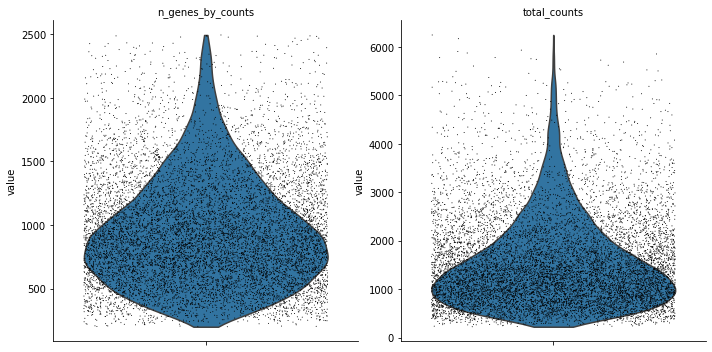

In [ ]:
sc.pl.violin(rna_count, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, multi_panel=True)

From the above plot we can see that there are no significatn outliers and hence we do not need to filer the data

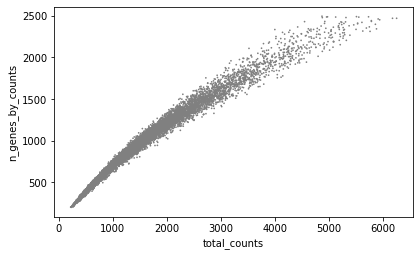

In [ ]:
sc.pl.scatter(rna_count, x='total_counts', y='n_genes_by_counts')

Normalised the total count in the data matrix $\mathbf{rna count}$ to 10,000 reads per cell, so that counts become comparable among cells.

In [ ]:
sc.pp.normalize_total(rna_count, target_sum=1e4) #all the cells have their total count of genes as same after nomralization

Logarithmize the data:

In [ ]:
sc.pp.log1p(rna_count)

In [ ]:
rna_count.to_df()

,0,1,2,3,4,5,6,7,8,9,...,32138,32141,32159,32277,32398,32431,32692,32700,32726,32904
09A_CAGCCCCGCCTT,0.0,0.0,1.152737,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09A_CGCCTACCATGA,0.0,0.0,0.000000,1.984602,1.128834,0.000000,0.000000,0.0,0.0,1.645596,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09A_GATGCGCGGCTA,0.0,0.0,0.000000,0.000000,0.000000,1.116666,1.631064,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09A_GGTCCGAGTCCT,0.0,0.0,0.000000,0.000000,1.145668,0.000000,1.145668,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09A_TCTCCCGGCACC,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.195661,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
09L_TACTAGTTCAAG,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09L_ATGACGGGCCCC,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09L_GAAACACCTCAT,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09L_AACGGTTTATCC,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Identify highly-variable genes.

In [ ]:
sc.pp.highly_variable_genes(rna_count, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [ ]:
rna_count

AnnData object with n_obs × n_vars = 10309 × 25403
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [ ]:
rna_count.var[rna_count.var['highly_variable']==True]

,gene_ids,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm
2,0610009B22Rik,145,False,145,0.016199,98.593462,167.0,True,0.105839,2.451600,0.560699
5,0610009O20Rik,399,False,399,0.041517,96.129595,428.0,True,0.264999,2.447243,0.547711
14,0610040J01Rik,267,False,267,0.028131,97.410030,290.0,True,0.190290,2.585956,0.961191
19,1110002L01Rik,231,False,231,0.023766,97.759239,245.0,True,0.157421,2.563246,0.893497
23,1110006O24Rik,23,False,23,0.002619,99.776894,27.0,True,0.024619,3.329370,3.177191
...,...,...,...,...,...,...,...,...,...,...,...
26519,9230116N13Rik,11,False,11,0.001164,99.893297,12.0,True,0.013392,3.720070,4.341806
26629,Dynlt1f,16,False,16,0.001552,99.844796,16.0,True,0.015407,2.528769,0.790727
26797,Gm13688,25,False,25,0.002619,99.757493,27.0,True,0.019405,2.590866,0.975830
27764,Unc13d,19,False,19,0.002037,99.815695,21.0,True,0.016227,2.586183,0.961869


Highly variable genes are those that have a lot of variation in their count among the cells

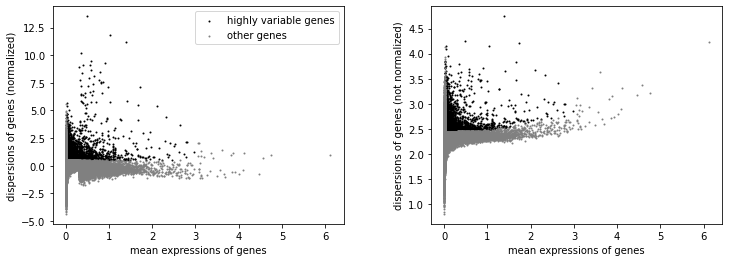

In [ ]:
sc.pl.highly_variable_genes(rna_count)

In [ ]:
rna_count.raw = rna_count

In [ ]:
rna_count

AnnData object with n_obs × n_vars = 10309 × 25403
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

performing the filtering

In [ ]:
rna_count = rna_count[:, rna_count.var.highly_variable]# taking only the highly varible genes

In [ ]:
rna_count

View of AnnData object with n_obs × n_vars = 10309 × 4301
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [ ]:
sc.pp.regress_out(rna_count, ['total_counts']) # regressing or partiallizing out the variable

In [ ]:
rna_count.var

,gene_ids,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm
2,0610009B22Rik,145,False,145,0.016199,98.593462,167.0,True,0.105839,2.451600,0.560699
5,0610009O20Rik,399,False,399,0.041517,96.129595,428.0,True,0.264999,2.447243,0.547711
14,0610040J01Rik,267,False,267,0.028131,97.410030,290.0,True,0.190290,2.585956,0.961191
19,1110002L01Rik,231,False,231,0.023766,97.759239,245.0,True,0.157421,2.563246,0.893497
23,1110006O24Rik,23,False,23,0.002619,99.776894,27.0,True,0.024619,3.329370,3.177191
...,...,...,...,...,...,...,...,...,...,...,...
26519,9230116N13Rik,11,False,11,0.001164,99.893297,12.0,True,0.013392,3.720070,4.341806
26629,Dynlt1f,16,False,16,0.001552,99.844796,16.0,True,0.015407,2.528769,0.790727
26797,Gm13688,25,False,25,0.002619,99.757493,27.0,True,0.019405,2.590866,0.975830
27764,Unc13d,19,False,19,0.002037,99.815695,21.0,True,0.016227,2.586183,0.961869


Clip values exceeding standard deviation 10.

In [ ]:
sc.pp.scale(rna_count, max_value=10) # scaling each gene to unit variance and clipping those that exceed 10

In [ ]:
rna_count.to_df()

,2,5,14,19,23,24,33,38,42,46,...,26243,26261,26264,26288,26413,26519,26629,26797,27764,27908
09A_CAGCCCCGCCTT,4.452266,-0.264664,-0.240122,-0.240187,-0.052771,-0.122745,-0.076635,-0.233853,-0.361666,-0.219917,...,0.021326,-0.064931,-0.031814,-0.023929,-0.014971,-0.019413,0.016003,-0.071259,-0.039399,-0.035090
09A_CGCCTACCATGA,-0.191974,-0.268455,-0.244598,-0.245249,-0.053220,-0.123042,-0.078425,-0.239083,-0.368175,-0.224364,...,0.024169,-0.066247,-0.031353,-0.023190,-0.013739,-0.018804,0.018948,-0.072540,-0.039285,-0.034934
09A_GATGCGCGGCTA,-0.194027,2.486557,-0.246959,-0.247919,-0.053456,-0.123198,-0.079369,-0.241841,-0.371607,-0.226709,...,0.025667,-0.066941,-0.031110,-0.022801,-0.013090,-0.018482,0.020501,-0.073216,-0.039225,-0.034852
09A_GGTCCGAGTCCT,-0.189212,-0.265767,-0.241424,-0.241660,-0.052902,-0.122831,10.000000,-0.235375,-0.363559,-0.221210,...,0.022153,-0.065314,-0.031680,-0.023714,-0.014612,-0.019236,0.016860,-0.071632,-0.039366,-0.035045
09A_TCTCCCGGCACC,-0.181518,-0.258278,-0.232581,-0.231658,-0.052016,-0.122246,-0.073618,-0.225041,-0.350699,-0.212424,...,0.016537,-0.062713,-0.032591,-0.025174,-0.017045,-0.020441,0.011041,-0.069100,-0.039592,-0.035352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
09L_TACTAGTTCAAG,-0.086001,-0.165305,-0.122792,-0.107491,-0.041023,-0.114974,-0.029709,-0.096764,-0.191050,-0.103352,...,-0.053183,-0.030433,-0.043896,-0.043301,-0.047242,-0.035397,-0.061201,-0.037674,-0.042395,-0.039169
09L_ATGACGGGCCCC,-0.091147,-0.170314,-0.128706,-0.114180,-0.041615,-0.115365,-0.032074,-0.103674,-0.199650,-0.109227,...,-0.049427,-0.032172,-0.043287,-0.042325,-0.045616,-0.034591,-0.057310,-0.039367,-0.042244,-0.038963
09L_GAAACACCTCAT,-0.086710,-0.165995,-0.123606,-0.108412,-0.041104,-0.115028,-0.030034,-0.097715,-0.192233,-0.104160,...,-0.052666,-0.030673,-0.043812,-0.043167,-0.047018,-0.035286,-0.060665,-0.037907,-0.042374,-0.039140
09L_AACGGTTTATCC,-0.089447,-0.168660,-0.126753,-0.111971,-0.041419,-0.115236,-0.031293,-0.101392,-0.196809,-0.107287,...,-0.050668,-0.031598,-0.043488,-0.042647,-0.046153,-0.034857,-0.058595,-0.038808,-0.042294,-0.039031


In [ ]:
np.mean(rna_count.to_df()['5'])

-1.0956523466276735e-09

#rna seq preprocessed data


# Ataq seq data


### 1.1 Data preparation (ATAQ-Seq)
Reading the ATAQ-Seq data

In [ ]:
cmat = scipy.io.mmread(os.path.join("", path+"/GSE126074_AdBrainCortex_SNAREseq_chromatin.counts.mtx.gz"))
cmat1=pd.DataFrame.sparse.from_spmatrix(cmat)
cmat=sc.AnnData(cmat1)

In [ ]:
cmat

AnnData object with n_obs × n_vars = 244544 × 10309

In [ ]:
atac_count = cmat.T
atac_barcode=pd.read_csv(path+"/GSE126074_AdBrainCortex_SNAREseq_chromatin.barcodes.tsv",sep="/t",header=None)
atac_peaks=pd.read_csv(path+"/GSE126074_AdBrainCortex_SNAREseq_chromatin.peaks.tsv",sep="/t",header=None)

In [ ]:
atac_count.var_names= atac_peaks[0].values
atac_count.var_names_make_unique(join="-")

In [ ]:
atac_count

AnnData object with n_obs × n_vars = 10309 × 244544

In [ ]:
atac_count.obs_names=atac_barcode[0]
atac_count.obs_names_make_unique(join="-")

In [ ]:
len(atac_barcode) #cells

10309

In [ ]:
len(atac_peaks) #genes

244544

In [ ]:
atac_count.var #RNA genes

""
chr1:3005833-3005982
chr1:3094772-3095489
chr1:3119556-3120739
chr1:3121334-3121696
chr1:3134637-3135032
...
chrY:90732105-90732474
chrY:90740917-90741416
chrY:90741519-90742734
chrY:90742824-90743114


In [ ]:
atac_count.obs # Cells

""
09A_GATGCGCGGCTA
09A_GCCATGACCCCA
09F_TGGACGATTTGT
09K_GTCTGCCATTAC
09F_GGATGAAGAGGG
...
09F_AACCTCACTGAC
09B_CACGTTAGCGCG
09L_ATGTCAGATATA
09L_AGTGGCCTCCTT


In [ ]:
atac_barcode[0] # cells

0        09A_GATGCGCGGCTA
1        09A_GCCATGACCCCA
2        09F_TGGACGATTTGT
3        09K_GTCTGCCATTAC
4        09F_GGATGAAGAGGG
               ...       
10304    09F_AACCTCACTGAC
10305    09B_CACGTTAGCGCG
10306    09L_ATGTCAGATATA
10307    09L_AGTGGCCTCCTT
10308    09L_AGTCGGAACTCT
Name: 0, Length: 10309, dtype: object

In [ ]:
atac_count

AnnData object with n_obs × n_vars = 10309 × 244544

In [ ]:
atac_count.var

""
chr1:3005833-3005982
chr1:3094772-3095489
chr1:3119556-3120739
chr1:3121334-3121696
chr1:3134637-3135032
...
chrY:90732105-90732474
chrY:90740917-90741416
chrY:90741519-90742734
chrY:90742824-90743114


In [ ]:
cmat

AnnData object with n_obs × n_vars = 244544 × 10309

# Preprocessing

In [ ]:
print(np.max(atac_count.X))

16.0


Data matrix is not binarized - Binarize the data

In [ ]:
epi.pp.binarize(atac_count, copy=False) #binarize the data

In [ ]:
print(np.max(atac_count.X)) #binarized now

1.0


In [ ]:
atac_count.X

<10309x244544 sparse matrix of type '<class 'numpy.float32'>'
	with 25461864 stored elements in Compressed Sparse Row format>

In [ ]:
epi.pp.filter_cells(atac_count, min_features=1) #we get nb_features column using this
epi.pp.filter_features(atac_count, min_cells=1)

filtered out 6 peaks

In [ ]:
atac_count

AnnData object with n_obs × n_vars = 10309 × 244538
    obs: 'nb_features'
    var: 'n_cells'

In [ ]:
atac_count.obs

,nb_features
09A_GATGCGCGGCTA,6342
09A_GCCATGACCCCA,6306
09F_TGGACGATTTGT,5979
09K_GTCTGCCATTAC,5576
09F_GGATGAAGAGGG,4410
...,...
09F_AACCTCACTGAC,1150
09B_CACGTTAGCGCG,916
09L_ATGTCAGATATA,1068
09L_AGTGGCCTCCTT,714


# quality controls

logarithmize the data

In [ ]:
atac_count.obs['log_nb_features'] = [np.log10(x) for x in atac_count.obs['nb_features']]
atac_count

AnnData object with n_obs × n_vars = 10309 × 244538
    obs: 'nb_features', 'log_nb_features'
    var: 'n_cells'

In [ ]:
atac_count.obs

,nb_features,log_nb_features
09A_GATGCGCGGCTA,6342,3.802226
09A_GCCATGACCCCA,6306,3.799754
09F_TGGACGATTTGT,5979,3.776629
09K_GTCTGCCATTAC,5576,3.746323
09F_GGATGAAGAGGG,4410,3.644439
...,...,...
09F_AACCTCACTGAC,1150,3.060698
09B_CACGTTAGCGCG,916,2.961895
09L_ATGTCAGATATA,1068,3.028571
09L_AGTGGCCTCCTT,714,2.853698


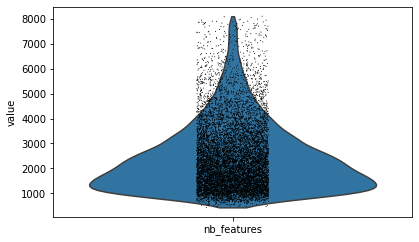

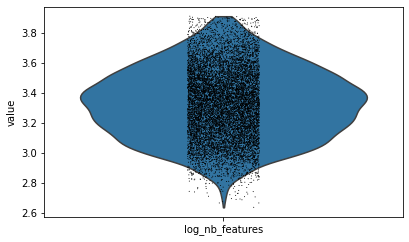

In [ ]:
epi.pl.violin(atac_count, ['nb_features'])
epi.pl.violin(atac_count, ['log_nb_features'])

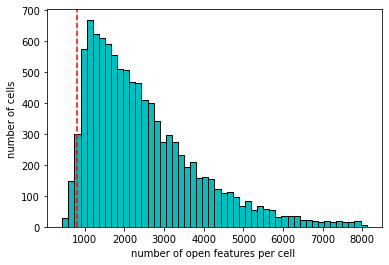

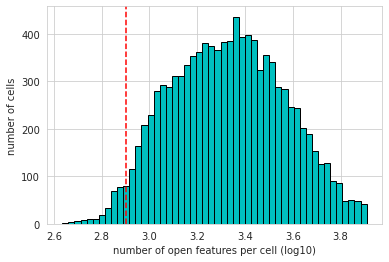

In [ ]:
# set a minimum number of cells to keep -800 features
min_features = 800

epi.pp.coverage_cells(atac_count, binary=True, log=False, bins=50,
               threshold=min_features, save='Buenrostro_bulk_peaks_coverage_cells.png')
epi.pp.coverage_cells(atac_count, binary=True, log=10, bins=50,
               threshold=min_features, save='Buenrostro_bulk_peaks_coverage_cells_log10.png')

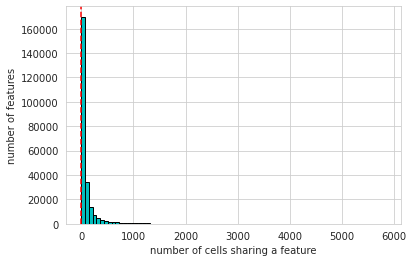

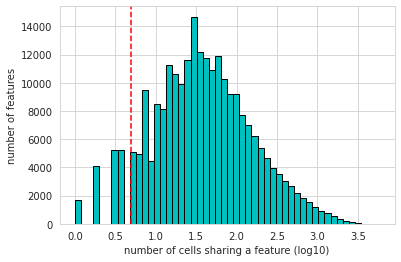

In [ ]:
# minimum number of cells sharing a feature
min_cells = 5
epi.pp.coverage_features(atac_count, binary=True, log=False,
                        threshold=min_cells, save='Buenrostro_bulk_peaks_coverage_peaks.png')
epi.pp.coverage_features(atac_count, binary=True, log=True,
                        threshold=min_cells, save='Buenrostro_bulk_peaks_coverage_peaks_log10.png')

## Actually proceed to filter the cells and peaks based on the QC plots

In [ ]:
min_features = 800
epi.pp.filter_cells(atac_count, min_features=min_features)
atac_count

AnnData object with n_obs × n_vars = 10032 × 244538
    obs: 'nb_features', 'log_nb_features'
    var: 'n_cells', 'commonness'

We removed 277 cells which had less than 800 features in them

In [ ]:
min_cells = 5
epi.pp.filter_features(atac_count, min_cells=min_cells)
atac_count

AnnData object with n_obs × n_vars = 10032 × 228025
    obs: 'nb_features', 'log_nb_features'
    var: 'n_cells', 'commonness'

## Looking at the QC plots after filtering

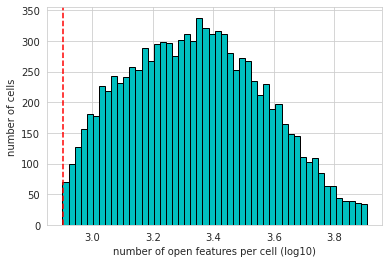

In [ ]:
epi.pp.coverage_cells(atac_count, binary=True, log='log10', bins=50, threshold=min_features)

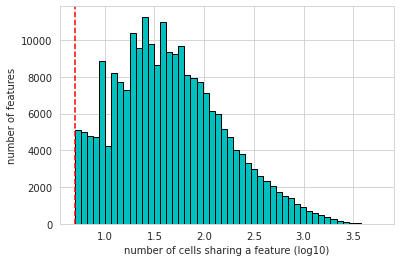

In [ ]:
epi.pp.coverage_features(atac_count, binary=True, log='log10', bins=50, threshold=min_cells)

## Identifying the most variable features

We aim to select a cuttof after the elbow.

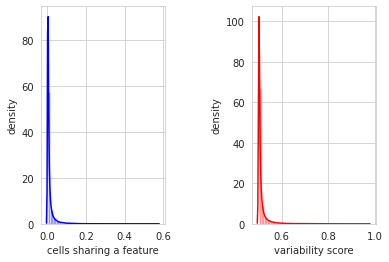

In [ ]:
epi.pp.cal_var(atac_count) #

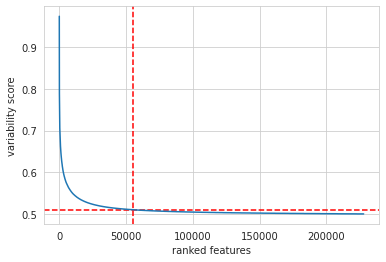

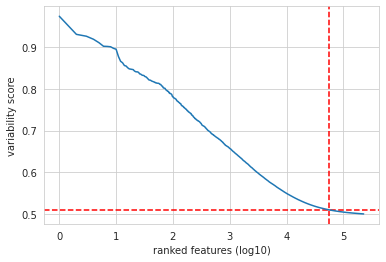

In [ ]:
#check where the elbow flattens out and use these features as they are the most variable features in the dataset
min_score_value = 0.510
nb_feature_selected = 55000
epi.pl.variability_features(atac_count,log=None,
                     min_score=min_score_value, nb_features=nb_feature_selected,
                     save='variability_features_plot_bonemarrow_peakmatrix.png')

epi.pl.variability_features(atac_count,log='log10',
                     min_score=min_score_value, nb_features=nb_feature_selected,
                     save='variability_features_plot_bonemarrow_peakmatrix_log10.png')

In [ ]:
# save the current matrix in the raw layer
atac_count.raw = atac_count

In [ ]:
# create a new AnnData containing only the most variable features
atac_count = epi.pp.select_var_feature(atac_count,
                                  nb_features=nb_feature_selected,
                                  show=False,
                                  copy=True)

In [ ]:
atac_count

View of AnnData object with n_obs × n_vars = 10032 × 55018
    obs: 'nb_features', 'log_nb_features'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'

In [ ]:
atac_count.var #variability_score column has variability score greater than .510 as indicated above

,n_cells,commonness,prop_shared_cells,variability_score
chr1:3094772-3095489,132.0,132.0,0.013158,0.513158
chr1:3119556-3120739,434.0,434.0,0.043262,0.543262
chr1:3121334-3121696,117.0,117.0,0.011663,0.511663
chr1:3292445-3293016,190.0,190.0,0.018939,0.518939
chr1:3309837-3310383,168.0,168.0,0.016746,0.516746
...,...,...,...,...
chrY:90732105-90732474,373.0,373.0,0.037181,0.537181
chrY:90740917-90741416,555.0,555.0,0.055323,0.555323
chrY:90741519-90742734,1409.0,1409.0,0.140451,0.640451
chrY:90742824-90743114,665.0,665.0,0.066288,0.566288


After removal of the lesser variable features we have 55,018 rows in the data left.

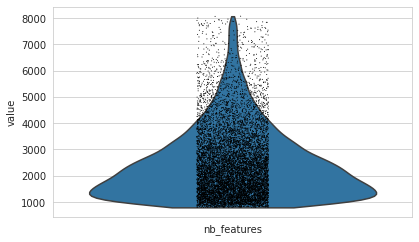

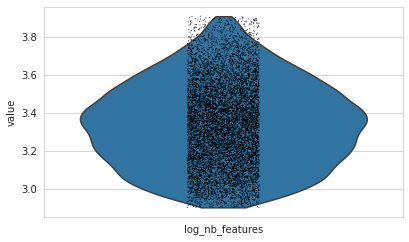

In [ ]:
#visualizing to check for outliers (in our case it's not really present)
epi.pl.violin(atac_count, ['nb_features'])
epi.pl.violin(atac_count, ['log_nb_features'])

In [ ]:
atac_count.var

,n_cells,commonness,prop_shared_cells,variability_score
chr1:3094772-3095489,132.0,132.0,0.013158,0.513158
chr1:3119556-3120739,434.0,434.0,0.043262,0.543262
chr1:3121334-3121696,117.0,117.0,0.011663,0.511663
chr1:3292445-3293016,190.0,190.0,0.018939,0.518939
chr1:3309837-3310383,168.0,168.0,0.016746,0.516746
...,...,...,...,...
chrY:90732105-90732474,373.0,373.0,0.037181,0.537181
chrY:90740917-90741416,555.0,555.0,0.055323,0.555323
chrY:90741519-90742734,1409.0,1409.0,0.140451,0.640451
chrY:90742824-90743114,665.0,665.0,0.066288,0.566288


In [ ]:
atac_count.to_df() # viewing the data

,chr1:3094772-3095489,chr1:3119556-3120739,chr1:3121334-3121696,chr1:3292445-3293016,chr1:3309837-3310383,chr1:3391831-3392476,chr1:3399823-3400568,chr1:3433756-3434460,chr1:3457789-3458115,chr1:3670910-3672688,...,chrX:170674882-170675184,chrY:1010138-1010889,chrY:1245435-1245988,chrY:1286238-1286811,chrY:90726135-90726362,chrY:90732105-90732474,chrY:90740917-90741416,chrY:90741519-90742734,chrY:90742824-90743114,chrY:90744284-90744731
09A_GATGCGCGGCTA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
09A_GCCATGACCCCA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
09F_TGGACGATTTGT,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
09K_GTCTGCCATTAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09F_GGATGAAGAGGG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
09G_TCAATATAGGAA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09A_GCAGTTCGCGGC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09F_AACCTCACTGAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09B_CACGTTAGCGCG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
atac_count

View of AnnData object with n_obs × n_vars = 10032 × 55018
    obs: 'nb_features', 'log_nb_features'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'

# Integration

# MMD-MA

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow
print(tensorflow.__version__)

1.15.2


#Filtering the data

In [ ]:
type(atac_count)

anndata._core.anndata.AnnData

In [ ]:
random_choices1=np.random.choice(10309,size=5000,replace=False)

In [ ]:
rna_seq_filtered=rna_count.X[random_choices1,:]

In [ ]:
atac_seq_filtered=atac_count.X.toarray()
random_choices2=np.random.choice(9392,size=5000,replace=False)
atac_seq_filtered=atac_seq_filtered[random_choices2,:]

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
rna_k=linear_kernel(rna_seq_filtered,Y=None,dense_output=True)

In [ ]:
atac_k=linear_kernel(atac_seq_filtered,Y=None,dense_output=True)

In [ ]:
np.save('rna.npy',rna_k)
np.save('atac.npy',atac_k)

In [ ]:
atac_k.shape[0]

5000

In [ ]:
#/content/drive/MyDrive/ML_In_Bio/Hw2/manifoldAlignDistortionPen_mmd_multipleStarts_Final.py
%run manifoldAlignDistortionPen_mmd_multipleStarts_Final.py rna.npy atac.npy


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where





<Figure size 432x288 with 0 Axes>

In [ ]:
f=open('alpha_hat_0_9900.txt')
rna_alpha=np.loadtxt(f)
f=open('beta_hat_0_9900.txt')
rna_beta=np.loadtxt(f)

In [ ]:
Rna_mmd=np.matmul(rna_alpha.T,rna_k).T

In [ ]:
Rna_atac=np.matmul(rna_beta.T,atac_k).T

In [ ]:
!pip install -r /content/drive/MyDrive/ML_In_Bio/Hw2/SCOT-master/src/requirements.txt #/content/drive/MyDrive/SCOT/src/requirements.txt

In [ ]:
import sys
sys.path.insert(1,'/content/drive/MyDrive/ML_In_Bio/Hw2/SCOT-master/src')
import evals as evals
import scot as scot
import numpy as np

In [ ]:
fran_mmd=evals.calc_domainAveraged_FOSCTTM(Rna_mmd,Rna_atac)
atac_mmd=np.mean(fran_mmd)

FOSCTTM Score For MMD-MA

In [ ]:
atac_mmd

0.42947061412282456

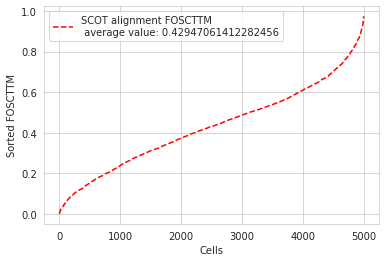

In [ ]:
import matplotlib.pyplot as plt
legend_label="MMD-MA alignment FOSCTTM \n average value: "+str(np.mean(fran_mmd))
plt.plot(np.arange(len(fran_mmd)), np.sort(fran_mmd), "r--", label=legend_label)
plt.legend()
plt.xlabel("Cells")
plt.ylabel("Sorted FOSCTTM")
plt.show()

# Scott

In [ ]:
X=rna_count.X[np.random.choice(rna_count.X.shape[0],500,False),:]
y=atac_count.X[np.random.choice(atac_count.X.shape[0],500,False),:]
y=y.toarray()

In [ ]:
scot=scot.SCOT(X, y)
# Call the alignment with l2 normalization
X_new, y_new = scot.align(k=20, e=1e-3,  normalize=True)

It.  |Err         
-------------------
    0|2.819541e-03|


   10|2.675802e-03|
   20|1.186099e-03|
   30|5.093890e-04|
   40|3.475826e-04|
   50|2.014228e-04|
   60|1.124545e-04|
   70|6.803163e-05|
   80|7.062876e-05|
   90|7.562461e-05|
  100|8.500121e-05|
  110|1.024152e-04|
  120|4.323848e-05|
  130|1.476685e-05|
  140|1.019421e-05|
  150|1.046675e-05|
  160|1.348080e-05|
  170|1.791777e-05|
  180|1.739057e-05|
  190|1.001087e-05|
It.  |Err         
-------------------
  200|4.425631e-06|
  210|1.890072e-06|
  220|8.617787e-07|
  230|4.343429e-07|
  240|2.390854e-07|
  250|1.395289e-07|
  260|8.424272e-08|
  270|5.184534e-08|
  280|3.225754e-08|
  290|2.019884e-08|
  300|1.269629e-08|
  310|7.998919e-09|
  320|5.046646e-09|
  330|3.186832e-09|
  340|2.013535e-09|
  350|1.272672e-09|
  360|8.045949e-10|


In [ ]:
X_new

In [ ]:
y_new

In [ ]:
fracs=evals.calc_domainAveraged_FOSCTTM(X_new, y_new) # This returns a vector of domain-averaged FOSCTTM per cell
# Each cell has two samples, one in domain X and one in Y (e.g. its chromatin access. and gene exp. data points)
# So we average them to obtain a single FOSCTTM per cell.3

avFOSCTTM= np.mean(fracs) #Then we average FOSCTTMs across all cells to obtain a single measure per alignment

print("Average FOSCTTM score for this alignment with X onto Y is: ", avFOSCTTM)

Average FOSCTTM score for this alignment with X onto Y is:  0.5023406813627255


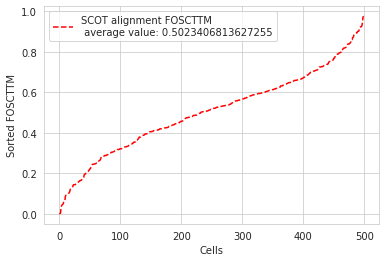

In [ ]:
import matplotlib.pyplot as plt
legend_label="SCOT alignment FOSCTTM \n average value: "+str(np.mean(fracs))
plt.plot(np.arange(len(fracs)), np.sort(fracs), "r--", label=legend_label)
plt.legend()
plt.xlabel("Cells")
plt.ylabel("Sorted FOSCTTM")
plt.show()

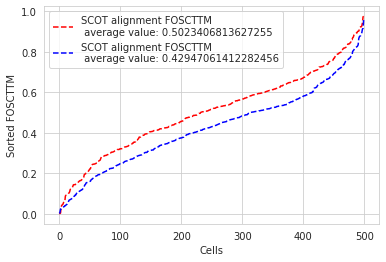

In [ ]:
import matplotlib.pyplot as plt
legend_label="SCOT alignment FOSCTTM \n average value: "+str(np.mean(fracs))
legend_label1="SCOT alignment FOSCTTM \n average value: "+str(np.mean(fran_mmd))
plt.plot(np.arange(len(fracs)), np.sort(fracs), "r--", label=legend_label)
plt.plot(np.arange(len(fracs)), np.sort(fran_mmd[:len(fracs)]), "b--", label=legend_label1)
plt.legend()
plt.xlabel("Cells")
plt.ylabel("Sorted FOSCTTM")
plt.show()

# Your try

In [ ]:
#from sklearn.metrics.pairwise import pairwise_kernels

In [ ]:
rna_kernal=pairwise_kernels(rna_count,metric='linear')

In [ ]:
atac_kernal=pairwise_kernels(atac_count,metric='linear')

In [ ]:
pd.DataFrame(rna_kernal).to_csv(path+'/kernal_rna.tsv',sep='\t',index=False,header=False)#header=none
pd.DataFrame(atac_kernal).to_csv(path+'/kernal_atac.tsv',sep='\t',index=False,header=False)

In [ ]:
atac_kernal

In [ ]:
#kernal_rna=pd.read_csv(path+'rna_kernal.csv')
#kernal_atac=pd.read_csv(path+'atac_kernal.csv')

In [ ]:
pd.DataFrame(rna_kernal).to_csv(path+'rna_kernal1.csv')
pd.DataFrame(atac_kernal).to_csv(path+'atac_kernal1.csv')

In [ ]:
a=pd.read_csv(path+'rna_kernal1.csv')
#a.to_csv(path+'kernal_rna1.tsv',sep='\t',index=False,header=False)
b=pd.read_csv(path+'atac_kernal1.csv')
#b.to_csv(path+'atac_kernal1.tsv',sep='\t',index=False,header=False)

In [ ]:
g=pd.read_csv('drive/MyDrive/ML_In_Bio/Hw2atac_kernal1.tsv',sep='\t')

In [ ]:
g

,0,8352.0,1293.0,1382.0,996.0,865.0,1452.0,858.0,797.0,1320.0,...,434.0.16,524.0.9,271.0.24,495.0.7,232.0.29,185.0.31,169.0.24,172.0.14,136.0.11,87.0.1
0,1,1293.0,9134.0,1771.0,1211.0,1104.0,1791.0,1092.0,956.0,1724.0,...,488.0,667.0,353.0,527.0,270.0,226.0,196.0,200.0,171.0,130.0
1,2,1382.0,1771.0,9374.0,1207.0,1191.0,1902.0,1086.0,945.0,1762.0,...,521.0,647.0,322.0,609.0,269.0,207.0,218.0,199.0,201.0,135.0
2,3,996.0,1211.0,1207.0,7587.0,847.0,1257.0,755.0,740.0,1246.0,...,383.0,489.0,265.0,417.0,207.0,151.0,143.0,146.0,137.0,83.0
3,4,865.0,1104.0,1191.0,847.0,5973.0,1286.0,732.0,602.0,1145.0,...,381.0,434.0,241.0,377.0,182.0,123.0,130.0,135.0,123.0,70.0
4,5,1452.0,1791.0,1902.0,1257.0,1286.0,10489.0,1235.0,1049.0,1822.0,...,557.0,678.0,365.0,641.0,305.0,226.0,227.0,221.0,173.0,139.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10303,10304,185.0,226.0,207.0,151.0,123.0,226.0,161.0,144.0,242.0,...,76.0,105.0,31.0,84.0,44.0,1353.0,28.0,28.0,29.0,15.0
10304,10305,169.0,196.0,218.0,143.0,130.0,227.0,128.0,109.0,229.0,...,64.0,90.0,51.0,63.0,31.0,28.0,976.0,21.0,20.0,9.0
10305,10306,172.0,200.0,199.0,146.0,135.0,221.0,136.0,117.0,206.0,...,70.0,75.0,48.0,79.0,37.0,28.0,21.0,1220.0,18.0,13.0
10306,10307,136.0,171.0,201.0,137.0,123.0,173.0,113.0,91.0,167.0,...,59.0,68.0,41.0,61.0,23.0,29.0,20.0,18.0,797.0,10.0


In [ ]:
#pd.DataFrame(kernal_rna).to_csv('kernal_rna.tsv',sep='\t',index=False,header=False)
#pd.DataFrame(kernal_atac).to_csv('kernal_atac.tsv',sep='\t',index=False,header=False)
#manifoldAlignDistortionPen_mmd_multipleStarts

In [ ]:
#kernal_rna.tsv
#kernal_atac.tsv
#kernal_rna_tsv=pd.read_csv(path+'rna_kernal.csv',sep='\t')
#kernal_atac_tsv=pd.read_csv(path+'atac_kernal.csv',sep='\t')

In [ ]:
#drive/MyDrive/ML_In_Bio/Hw2/manifoldAlignDistortionPen_mmd_multipleStarts (1).py
#as much as possible not creating memory issue
%run manifoldAlignDistortionPen_mmd_multipleStarts_Final.py drive/MyDrive/ML_In_Bio/Hw2/kernal_rna.tsv drive/MyDrive/ML_In_Bio/Hw2/kernal_atac.tsv


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where





KeyboardInterrupt: ignored

In [ ]:
beta

<tf.Variable 'Variable_1:0' shape=(10309, 2) dtype=float32_ref>

In [ ]:
#rna_kernal=pd.read_csv('drive/MyDrive/ML_In_Bio/Hw2/atac_kernal1.tsv',sep='\t')
#atac_kernal=
f=open('alpha_hat_0_1400.txt')

In [ ]:
aligned_rna_mdma= rna_kernal.dot(alpha)
aligned_atac_mdma= atac_kernal.dot(beta)

NameError: ignored

# Foscttm score

In [ ]:
import evals
fran_mmd=evals.calc_domainAveraged_FOSCTTM(aligned_rna_mdma,aligned_atac_mdma)
import pickle
file=open("f_mmd.pckl",'rb')
f_mmd=pickle.load(file)
avFoscottm_mmp=np.mean()

#Graph Partitioning

In [ ]:
!pip install scanpy
!pip install AnnData
!pip install episcanpy

In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import episcanpy.api as epi
import copy
from sklearn.cluster import KMeans
import scipy.io
import os

In [ ]:
'''ppi_mat = scipy.io.mmread(os.path.join("drive/MyDrive/ML_BIO/", "Scere20170205.txt.gz"))
ppi_mat1=pd.DataFrame.sparse.from_spmatrix(ppi_mat)
ppi_mat=sc.AnnData(ppi_mat1)''' #/content/drive/MyDrive/ML_In_Bio/Hw2/Scere20170205.txt
ppi_mat=pd.read_csv("/content/drive/MyDrive/ML_In_Bio/Hw2/Scere20170205.txt",sep="\t",index_col=False)

In [ ]:
ppi_mat

,ID interactor A,ID interactor B,Alt. ID interactor A,Alt. ID interactor B,Alias(es) interactor A,Alias(es) interactor B,Interaction detection method(s),Publication 1st author(s),Publication Identifier(s),Taxid interactor A,Taxid interactor B,Interaction type(s),Source database(s),Interaction identifier(s),Confidence value(s),Processing Status,Unnamed: 16
0,DIP-25N|refseq:NP_012903|uniprotkb:P09798,DIP-25N|refseq:NP_012903|uniprotkb:P09798,-,-,-,-,MI:0019(coimmunoprecipitation)|MI:0018(two hyb...,-,pubmed:7925276|pubmed:DIP-246S|pubmed:7925276|...,taxid:4932(Saccharomyces cerevisiae),taxid:4932(Saccharomyces cerevisiae),MI:0218(physical interaction)|MI:0218(physical...,MI:0465(dip),DIP-137E,dip-quality-status:core,dip:0002(small scale)|dip:0002(small scale),NaN
1,DIP-343N|refseq:NP_009971|uniprotkb:P23255,DIP-80N|refseq:NP_523805|uniprotkb:P20227,-,-,-,-,MI:0045(experimental interaction detection)|MI...,-,pubmed:8178153|pubmed:DIP-31S|pubmed:8178153|p...,taxid:4932(Saccharomyces cerevisiae),taxid:7227(Drosophila melanogaster),MI:0218(physical interaction)|MI:0218(physical...,MI:0465(dip),DIP-163E,dip-quality-status:core,dip:0002(small scale)|dip:0002(small scale),NaN
2,DIP-551N|refseq:NP_012231|uniprotkb:P07278,DIP-548N|refseq:NP_012371|uniprotkb:P06244,-,-,-,-,MI:0018(two hybrid)|MI:0018(two hybrid)|MI:039...,-,pubmed:16924114|pubmed:DIP-17259S|pubmed:16924...,taxid:4932(Saccharomyces cerevisiae),taxid:4932(Saccharomyces cerevisiae),MI:0915(physical association)|MI:0915(physical...,MI:0465(dip),DIP-244E,dip-quality-status:core,dip:0004(small scale)|dip:0004(small scale)|di...,NaN
3,DIP-18N|refseq:NP_010765|uniprotkb:P06782,DIP-780N|refseq:NP_014142|uniprotkb:P38717,-,-,-,-,MI:0018(two hybrid),-,pubmed:8127709|pubmed:DIP-255S,taxid:4932(Saccharomyces cerevisiae),taxid:4932(Saccharomyces cerevisiae),MI:0218(physical interaction),MI:0465(dip),DIP-436E,dip-quality-status:core,dip:0002(small scale),NaN
4,DIP-1104N|refseq:NP_013826|uniprotkb:P07342,DIP-671N|refseq:NP_009918|uniprotkb:P25605,-,-,-,-,MI:0013(biophysical)|MI:0071(molecular sieving...,-,pubmed:10213630|pubmed:DIP-2092S|pubmed:114633...,taxid:4932(Saccharomyces cerevisiae),taxid:4932(Saccharomyces cerevisiae),MI:0218(physical interaction)|MI:0218(physical...,MI:0465(dip),DIP-125E,dip-quality-status:core,dip:0002(small scale)|dip:0002(small scale)|di...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22972,DIP-4637N|refseq:NP_013525|uniprotkb:O13563,DIP-6817N|refseq:NP_013180|uniprotkb:P38634,-,-,-,-,MI:0096(pull down),-,pubmed:26912900|pubmed:DIP-18124S,taxid:4932(Saccharomyces cerevisiae),taxid:4932(Saccharomyces cerevisiae),MI:0915(physical association),MI:0465(dip),DIP-201142E,dip-quality-status:core,dip:0004(small scale),NaN
22973,DIP-1294N|refseq:NP_011314|uniprotkb:P53091,DIP-2405N|refseq:NP_013204|uniprotkb:Q08032,-,-,-,-,MI:0007(anti tag coimmunoprecipitation),-,pubmed:26854664|pubmed:DIP-18092S,taxid:4932(Saccharomyces cerevisiae),taxid:4932(Saccharomyces cerevisiae),MI:0915(physical association),MI:0465(dip),DIP-201270E,dip-quality-status:core,dip:0004(small scale),NaN
22974,DIP-1294N|refseq:NP_011314|uniprotkb:P53091,DIP-1812N|refseq:NP_010296|uniprotkb:Q12488,-,-,-,-,MI:0007(anti tag coimmunoprecipitation),-,pubmed:26854664|pubmed:DIP-18092S,taxid:4932(Saccharomyces cerevisiae),taxid:4932(Saccharomyces cerevisiae),MI:0915(physical association),MI:0465(dip),DIP-201271E,dip-quality-status:core,dip:0004(small scale),NaN
22975,DIP-2492N|refseq:NP_116650|uniprotkb:P07560,DIP-963N|refseq:NP_014824|uniprotkb:Q12446,-,-,-,-,"MI:0096(pull down)|MI:0809,(bimolecular fluore...",-,pubmed:27526190|pubmed:DIP-18183S|pubmed:27526...,taxid:4932(Saccharomyces cerevisiae),taxid:4932(Saccharomyces cerevisiae),MI:0407(direct interaction)|MI:0915(physical a...,MI:0465(dip),DIP-201456E,dip-quality-status:core,dip:0004(small scale)|dip:0004(small scale),NaN


In [ ]:
mat_df=ppi_mat[['ID interactor A','ID interactor B']]

In [ ]:
#mat_df.duplicate

In [ ]:
df = pd.crosstab(mat_df['ID interactor A'], mat_df['ID interactor B'])
idx = df.columns.union(df.index)
df = df.reindex(index = idx, columns=idx, fill_value=0)

In [ ]:
df

In [ ]:
A=df.to_numpy()

In [ ]:
#(A==A1).all()

In [ ]:
import networkx as nx

In [ ]:
m=mat_df.to_numpy().tolist() # convert adjacency matrix

In [ ]:
G=nx.from_edgelist(m)

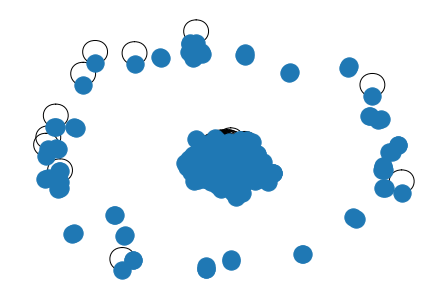

In [ ]:
nx.draw(G)

In [ ]:
A1 = nx.adjacency_matrix(G)

In [ ]:
A1=A1.toarray()

In [ ]:
G1 = nx.from_numpy_matrix(A)

In [ ]:
nx.draw(G1,node_size=5)

In [ ]:
!pip install igraph

In [ ]:
import igraph as ig

In [ ]:
!pip install cairocffi

In [ ]:
'''h = ig.Graph.from_networkx(G)
h.mincut().cluster_graph()'''

In [ ]:
!pip install python-louvain

In [ ]:
from community import community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

In [ ]:
partition = community_louvain.best_partition(G,resolution=1)

In [ ]:
type(partition)

In [ ]:
max(partition.values()) + 1

In [ ]:
!pip install sknetwork

In [ ]:
import networkx.algorithms.community as nx_comm

In [ ]:
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, scale=100)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nodes=nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=5,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.1)

plt.sci(nodes)
plt.colorbar()
plt.show()

In [ ]:
from sklearn.cluster import SpectralClustering

In [ ]:
sClustering = SpectralClustering(n_clusters = 50, affinity='precomputed', n_init=100)
sClustering.fit(A1)

print('spectral clustering')
print(sClustering.labels_)

In [ ]:
groupDict = dict(enumerate(x for x in sClustering.labels_))

In [ ]:
G = nx.from_numpy_matrix(A1)
# draw the graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, scale=100)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(groupDict.values()) + 1)
nodes=nx.draw_networkx_nodes(G, pos, groupDict.keys(), node_size=5,
                       cmap=cmap, node_color=list(groupDict.values()))
nx.draw_networkx_edges(G, pos, alpha=1.0)

plt.sci(nodes)
plt.colorbar()
plt.show()

In [ ]:
nx.minimum_node_cut(G1)

In [ ]:
A1.toarray()

# Go Enrichment analysis

In [ ]:
!pip install goatools

In [ ]:
from goatools.base import download_go_basic_obo
obo_fname = download_go_basic_obo()

  EXISTS: go-basic.obo


In [ ]:
from goatools.base import download_ncbi_associations
fin_gene2go = download_ncbi_associations()

  EXISTS: gene2go


In [ ]:
from goatools.obo_parser import GODag

obodag = GODag("go-basic.obo")

go-basic.obo: fmt(1.2) rel(2022-01-13) 47,158 Terms


In [ ]:
from __future__ import print_function
from goatools.anno.genetogo_reader import Gene2GoReader

# Read NCBI's gene2go. Store annotations in a list of namedtuples
objanno = Gene2GoReader(fin_gene2go, taxids=[559292])#559292

# Get namespace2association where:
#    namespace is:
#        BP: biological_process
#        MF: molecular_function
#        CC: cellular_component
#    assocation is a dict:
#        key: NCBI GeneID
#        value: A set of GO IDs associated with that gene
ns2assoc = objanno.get_ns2assc()

for nspc, id2gos in ns2assoc.items():
    print("{NS} {N:,} annotated yeast genes".format(NS=nspc, N=len(id2gos)))

HMS:0:00:02.821681  94,654 annotations,  6,420 genes,  6,099 GOs, 1 taxids READ: gene2go 
CC 5,968 annotated yeast genes
MF 4,988 annotated yeast genes
BP 5,652 annotated yeast genes


In [ ]:
from goatools.cli.ncbi_gene_results_to_python import ncbi_tsv_to_py

ncbi_tsv = '/content/drive/MyDrive/ML_In_Bio/Hw2/gene_result.txt'
output_py = 'genes_ncbi_559292_proteincoding.py'
ncbi_tsv_to_py(ncbi_tsv, output_py)

       6,016 lines READ:  /content/drive/MyDrive/ML_In_Bio/Hw2/gene_result.txt
       6,016 geneids WROTE: genes_ncbi_559292_proteincoding.py


In [ ]:
from genes_ncbi_559292_proteincoding import GENEID2NT as GeneID2nt_mus
print(len(GeneID2nt_mus))

6016


In [ ]:
from goatools.goea.go_enrichment_ns import GOEnrichmentStudyNS

goeaobj = GOEnrichmentStudyNS(
        GeneID2nt_mus.keys(), # List of mouse protein-coding genes
        ns2assoc, # geneid/GO associations
        obodag, # Ontologies
        propagate_counts = False,
        alpha = 0.05, # default significance cut-off
        methods = ['fdr_bh']) # defult multipletest correction method


Load BP Ontology Enrichment Analysis ...
 87%  5,259 of  6,016 population items found in association

Load CC Ontology Enrichment Analysis ...
 93%  5,576 of  6,016 population items found in association

Load MF Ontology Enrichment Analysis ...
 76%  4,600 of  6,016 population items found in association


In [ ]:
# Data will be stored in this variable
import os
geneid2symbol = {}
# Get xlsx filename where data is stored
ROOT = os.path.dirname(os.getcwd()) # go up 1 level from current working directory
din_xlsx = os.path.join(ROOT, "/content/drive/MyDrive/ML_In_Bio/Hw2/nbt.3102-S4_GeneIDs.xlsx")
# Read data
if os.path.isfile(din_xlsx):
    import xlrd
    book = xlrd.open_workbook(din_xlsx)
    pg = book.sheet_by_index(0)
    for r in range(pg.nrows):
        symbol, geneid, pval = [pg.cell_value(r, c) for c in range(pg.ncols)]
        #print('Symbol {} geneID {} pval {}'.format(symbol, geneid, pval))
        if geneid:
            geneid2symbol[int(geneid)] = symbol
    print('{N} genes READ: {XLSX}'.format(N=len(geneid2symbol), XLSX=din_xlsx))
else:
    raise RuntimeError('FILE NOT FOUND: {XLSX}'.format(XLSX=din_xlsx))

400 genes READ: /content/drive/MyDrive/ML_In_Bio/Hw2/nbt.3102-S4_GeneIDs.xlsx


In [ ]:
geneid2symbol

{11429: 'Aco2',
 11461: 'Actb',
 11465: 'Actg1',
 11569: 'Aebp2',
 11637: 'Ak2',
 11674: 'Aldoa',
 11676: 'Aldoc',
 11739: 'Slc25a4',
 11740: 'Slc25a5',
 11749: 'Anxa6',
 11773: 'Ap2m1',
 11799: 'Birc5',
 11821: 'Aprt',
 11837: 'Rplp0',
 11840: 'Arf1',
 11857: 'Arhgdib',
 11867: 'Arpc1b',
 11946: 'Atp5a1',
 11947: 'Atp5b',
 11950: 'Atp5f1',
 11992: 'Auh',
 12010: 'B2m',
 12043: 'Bcl2',
 12176: 'Bnip3',
 12177: 'Bnip3l',
 12215: 'Bsg',
 12226: 'Btg1',
 12236: 'Bub1b',
 12238: 'Commd3',
 12306: 'Anxa2',
 12313: 'Calm1',
 12317: 'Calr',
 12326: 'Camk4',
 12330: 'Canx',
 12331: 'Cap1',
 12332: 'Capg',
 12340: 'Capza1',
 12368: 'Casp6',
 12399: 'Runx3',
 12444: 'Ccnd2',
 12445: 'Ccnd3',
 12453: 'Ccni',
 12481: 'Cd2',
 12487: 'Cd28',
 12500: 'Cd3d',
 12502: 'Cd3g',
 12503: 'Cd247',
 12506: 'Cd48',
 12508: 'Cd53',
 12520: 'Cd81',
 12521: 'Cd82',
 12540: 'Cdc42',
 12571: 'Cdk6',
 12575: 'Cdkn1a',
 12581: 'Cdkn2d',
 12631: 'Cfl1',
 12721: 'Coro1a',
 12857: 'Cox4i1',
 12861: 'Cox6a1',
 12916: 'C

In [ ]:
geneids_study

dict_keys([100033452, 18746, 13806, 18301, 56040, 12631, 11837, 18655, 22121, 76846, 19951, 433182, 67945, 100042823, 11674, 667618, 100043000, 16828, 103324, 628060, 674597, 13629, 12215, 270106, 227929, 20103, 11465, 20345, 14964, 67963, 100040970, 14694, 14462, 18826, 67115, 67891, 19899, 16898, 22352, 69717, 11739, 10041686, 12444, 27370, 13627, 276770, 12540, 16792, 27207, 100039940, 14972, 100043295, 12177, 70186, 22388, 12500, 12313, 11461, 11749, 27050, 107702, 76808, 16190, 19354, 76709, 19988, 66940, 14751, 67427, 17319, 68193, 18643, 12575, 12445, 16184, 621054, 20044, 21991, 21936, 218490, 66151, 15516, 78330, 12368, 20088, 100034726, 20085, 50794, 67097, 12502, 110213, 27176, 20115, 12481, 19989, 19244, 20102, 12861, 12857, 218963, 12721, 12010, 56421, 68436, 54709, 14319, 108101, 22187, 21942, 12571, 66494, 59042, 16785, 53314, 100040823, 24109, 11857, 56637, 20318, 245007, 19188, 18453, 68135, 78781, 69573, 20091, 11429, 11950, 22627, 109801, 65019, 20054, 12916, 267019,

In [ ]:
goeaobj

In [ ]:
# 'p_' means "pvalue". 'fdr_bh' is the multipletest method we are currently using.
geneids_study = geneid2symbol.keys()
goea_results_all = goeaobj.run_study(geneids_study)
goea_results_sig = [r for r in goea_results_all]#0.05fdr_bhif r.p < 0.05


Runing BP Ontology Analysis: current study set of 400 IDs.
  0%      0 of      0 study items found in association
  0%      0 of    400 study items found in population(6016)

Runing CC Ontology Analysis: current study set of 400 IDs.
  0%      0 of      0 study items found in association
  0%      0 of    400 study items found in population(6016)

Runing MF Ontology Analysis: current study set of 400 IDs.
  0%      0 of      0 study items found in association
  0%      0 of    400 study items found in population(6016)


In [ ]:
goea_results_all

[]

In [ ]:
goea_quiet_all = goeaobj.run_study(geneids_study, prt=None)
goea_quiet_sig = [r for r in goea_results_all if r.p_fdr_bh < 0.05]

In [ ]:
print('{N} of {M:,} results were significant'.format(
    N=len(goea_quiet_sig),
    M=len(goea_quiet_all)))

0 of 0 results were significant
